In [3]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import time

#warnings.filterwarnings('ignore')

In [5]:
#set max columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

## El dataset incluido en el proyecto tiene información sobre la satisfacción de los pasajeros de una aerolínea.
En el proyecto hay que realizar las siguientes tareas:
- Análisis de los datos
 Indica qué variables hay, su distribución y comenta lo más destacable.
 Indica qué clases hay y comprueba si las clases a predecir están equilibradas.
-  Separa los datos en entrenamiento y test.
-  Para cada uno de los tipos de algoritmos que hemos visto, configura el mejor modelo posible.
- Aplica los modelos al conjunto de test y discute cual es el mejor y el peor modelo.

In [6]:
df = pd.read_csv('airline.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [8]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


# Entendiendo el Dataset y el Problema

El dataset en cuestión contiene información detallada sobre los pasajeros de una aerolínea, incluyendo datos demográficos (edad, género), preferencias de viaje (tipo de cliente, propósito del viaje, clase), experiencia de vuelo (distancia de vuelo, retraso en la salida y llegada, servicios a bordo como comida, entretenimiento, Wi-Fi, limpieza, asientos) y nivel de satisfacción (satisfecho o neutral/insatisfecho).

In [9]:
# Remove unnecessary columns
df = df.drop(['Unnamed: 0', 'id'], axis=1)

In [10]:
# Check for missing values
print(df.isnull().sum())

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64


In [11]:
# Handle missing values in 'Arrival Delay in Minutes'
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)
df.head()

/var/folders/0j/c164mtv91wq70n6m8ptmtmww0000gn/T/ipykernel_73857/3154578464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


# Análisis Exploratorio de Datos (EDA)

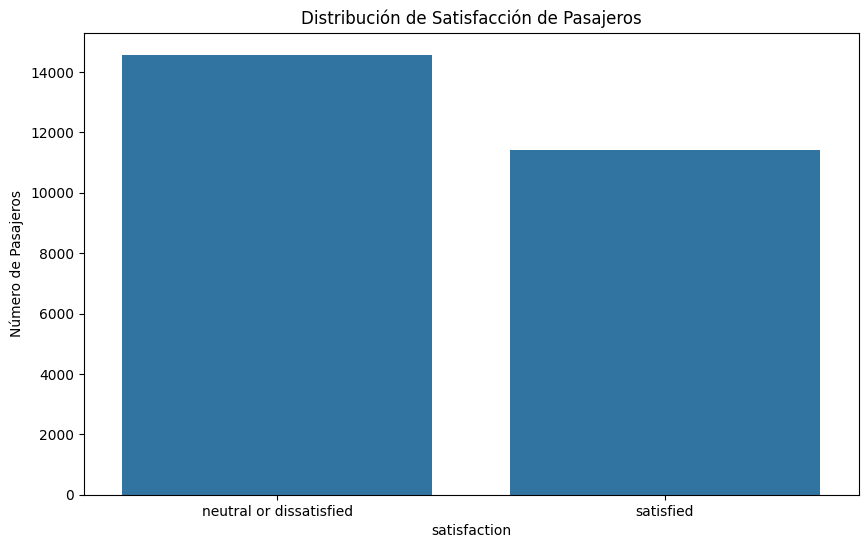

In [12]:
# 1.1 Visualización de la distribución de la variable objetivo
plt.figure(figsize=(10, 6))
satisfaction_counts = df['satisfaction'].value_counts()
sns.barplot(x=satisfaction_counts.index, y=satisfaction_counts.values)
plt.title('Distribución de Satisfacción de Pasajeros')
plt.ylabel('Número de Pasajeros')
plt.show()

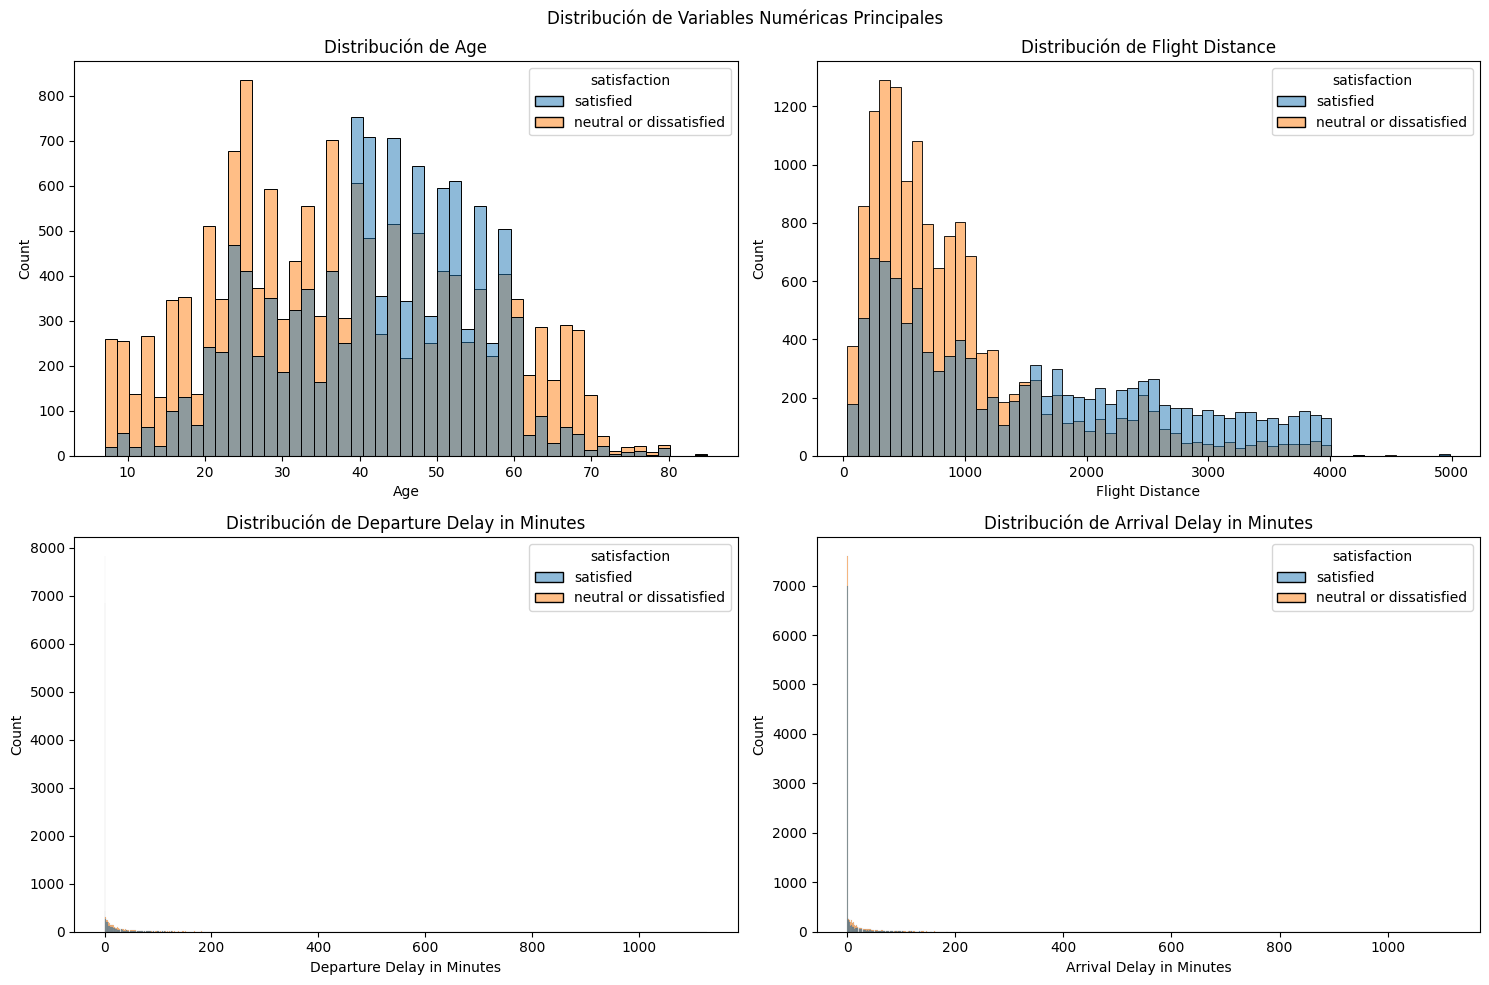

In [13]:
# Análisis de variables numéricas

# Crear un subplot para las principales variables numéricas
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas Principales')

for idx, feature in enumerate(numerical_features):
    row = idx // 2
    col = idx % 2
    sns.histplot(data=df, x=feature, hue='satisfaction', ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {feature}')

plt.tight_layout()
plt.show()

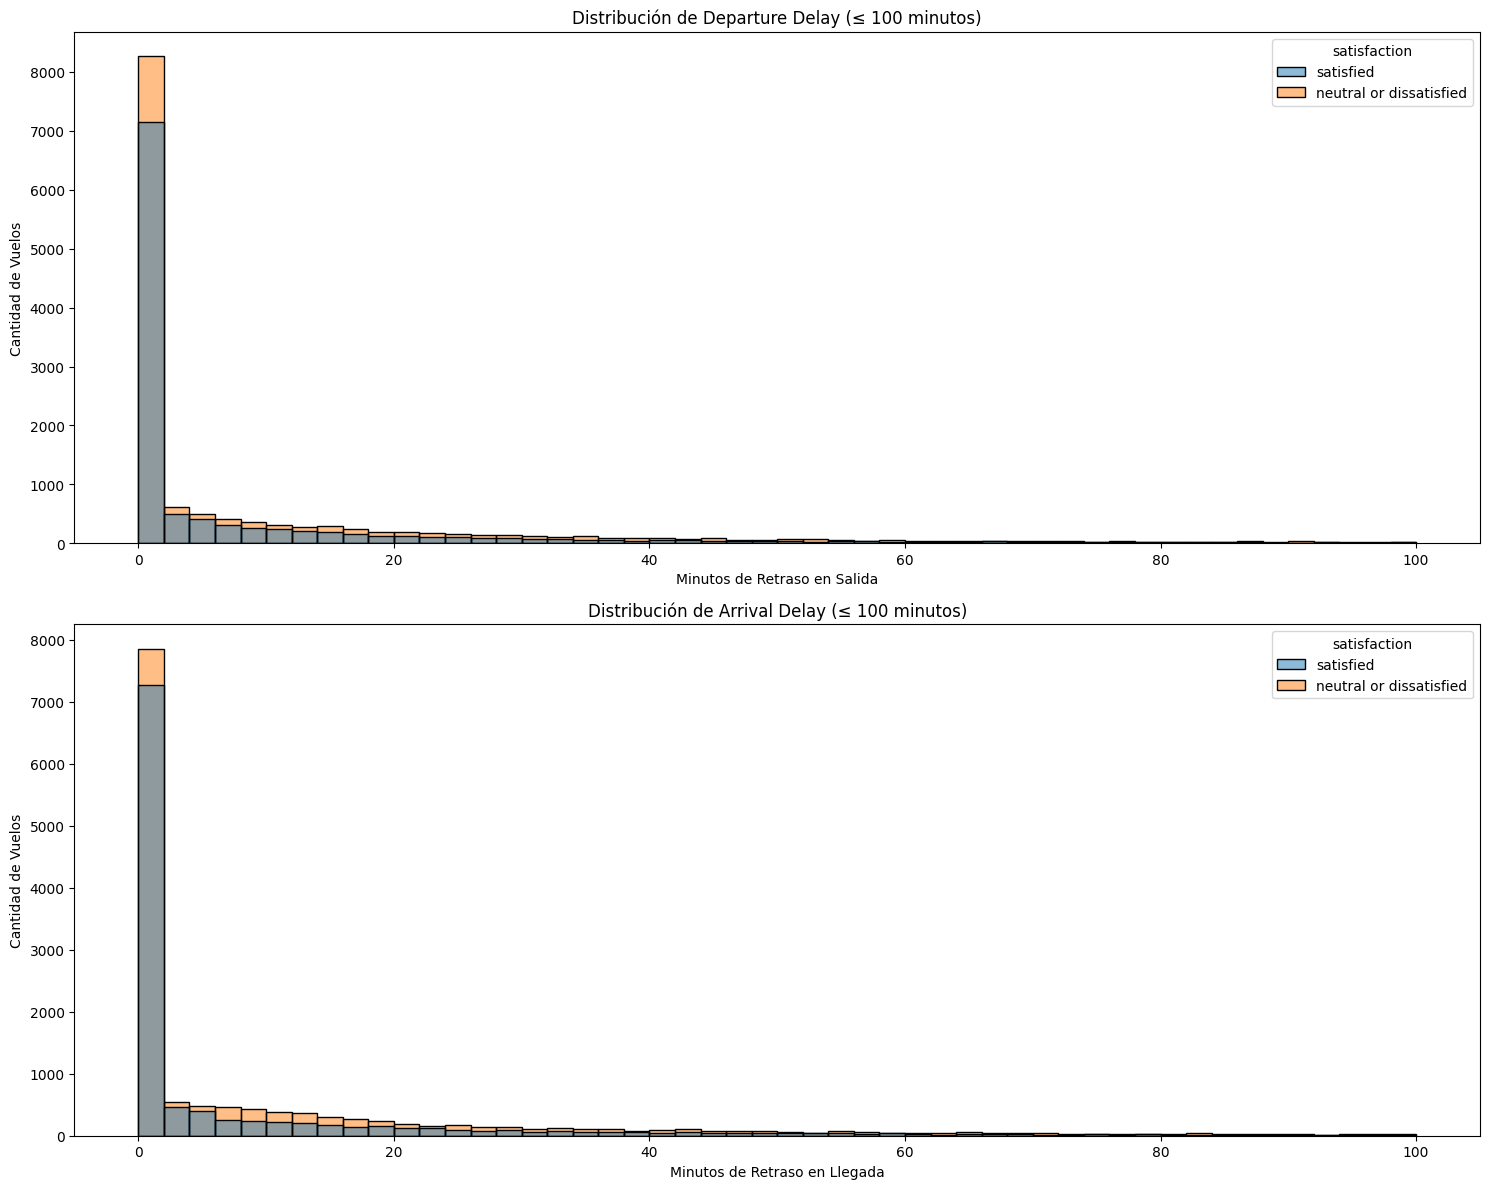


Estadísticas de Delays:

Departure Delay:
count    25976.00000
mean        14.30609
std         37.42316
min          0.00000
25%          0.00000
50%          0.00000
75%         12.00000
max       1128.00000
Name: Departure Delay in Minutes, dtype: float64

Arrival Delay:
count    25976.000000
mean        14.740857
std         37.457549
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max       1115.000000
Name: Arrival Delay in Minutes, dtype: float64

Porcentaje de vuelos con:
Departure Delay > 15 min: 21.89%
Arrival Delay > 15 min: 22.80%


In [14]:
# Mejorar visualización de delays
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Departure Delay con límite y transformación log
sns.histplot(
    data=df[df['Departure Delay in Minutes'] <= 100],  # Limitamos a delays <= 100 minutos
    x='Departure Delay in Minutes',
    hue='satisfaction',
    bins=50,
    ax=axes[0]
)
axes[0].set_title('Distribución de Departure Delay (≤ 100 minutos)')
axes[0].set_xlabel('Minutos de Retraso en Salida')
axes[0].set_ylabel('Cantidad de Vuelos')

# Arrival Delay con límite y transformación log
sns.histplot(
    data=df[df['Arrival Delay in Minutes'] <= 100],  # Limitamos a delays <= 100 minutos
    x='Arrival Delay in Minutes',
    hue='satisfaction',
    bins=50,
    ax=axes[1]
)
axes[1].set_title('Distribución de Arrival Delay (≤ 100 minutos)')
axes[1].set_xlabel('Minutos de Retraso en Llegada')
axes[1].set_ylabel('Cantidad de Vuelos')

plt.tight_layout()
plt.show()

# Mostrar estadísticas de los delays
print("\nEstadísticas de Delays:")
print("\nDeparture Delay:")
print(df['Departure Delay in Minutes'].describe())
print("\nArrival Delay:")
print(df['Arrival Delay in Minutes'].describe())

# Calcular porcentaje de vuelos con delays significativos
print("\nPorcentaje de vuelos con:")
print(f"Departure Delay > 15 min: {(df['Departure Delay in Minutes'] > 15).mean()*100:.2f}%")
print(f"Arrival Delay > 15 min: {(df['Arrival Delay in Minutes'] > 15).mean()*100:.2f}%")

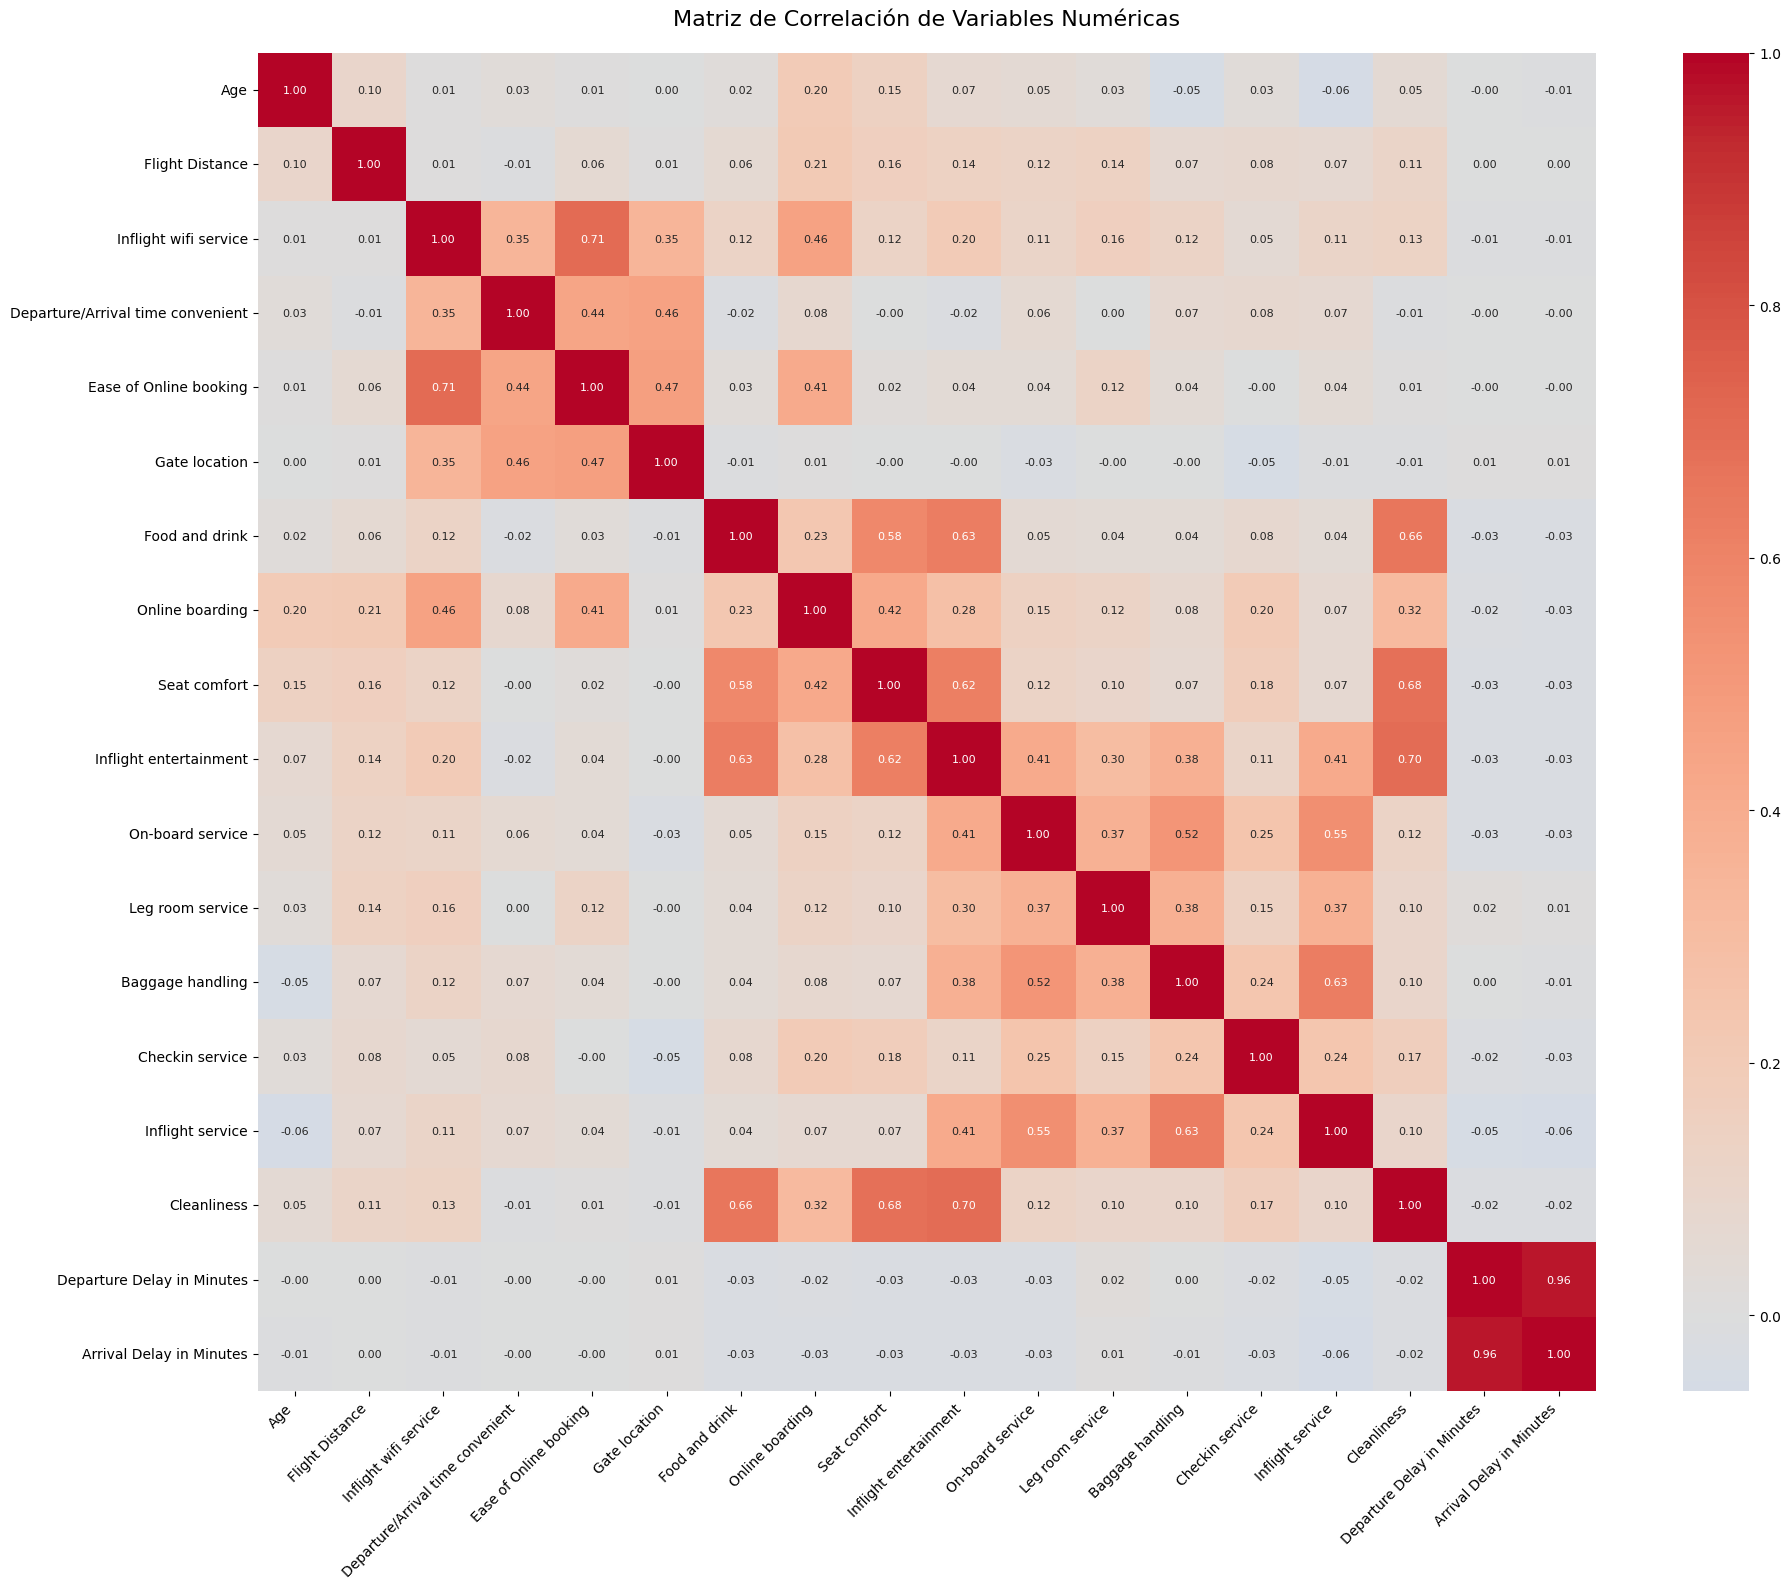

In [15]:
# Análisis de correlaciones mejorado
plt.figure(figsize=(20, 16))  # Tamaño más grande
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr().round(2)  # Redondear a 2 decimales

# Crear el mapa de calor con parámetros ajustados
sns.heatmap(correlation_matrix, 
            annot=True,  
            cmap='coolwarm',  # Esquema de colores
            center=0,  
            fmt='.2f',  # Formato de 2 decimales
            annot_kws={'size': 8},  # Tamaño de letra más pequeño
            square=True)  # Hacer las celdas cuadradas

plt.title('Matriz de Correlación de Variables Numéricas', pad=20, size=16)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor lectura
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar el layout automáticamente
plt.show()

Distribución General:
- La mayoría de los vuelos (aproximadamente 75%) no tienen retrasos (mediana = 0 para ambos)
- Hay una cola larga hacia la derecha (distribución muy sesgada)
- Los valores máximos son extremos: 1128 minutos (~19 horas) para salidas y 1115 minutos (~18.5 horas) para llegadas

Retrasos Significativos:
- Solo ~22% de los vuelos tienen retrasos superiores a 15 minutos en la salida
- ~23% tienen retrasos superiores a 15 minutos en la llegada
- Los retrasos medios son similares: ~14.3 minutos en salida y ~14.7 minutos en llegada

Relación con Satisfacción:
- Se observa una ligera tendencia a mayor insatisfacción cuando hay retrasos
- La mayoría de los vuelos puntuales tienen una proporción mayor de pasajeros satisfechos

In [16]:
# Crear categorías de retraso
def categorize_delay(minutes):
    if minutes == 0:
        return 'Sin retraso'
    elif minutes <= 15:
        return 'Retraso menor (≤15 min)'
    elif minutes <= 30:
        return 'Retraso moderado (16-30 min)'
    else:
        return 'Retraso significativo (>30 min)'

# Codificar la variable satisfaction
le = LabelEncoder()
df['satisfaction_encoded'] = le.fit_transform(df['satisfaction'])

# Crear nuevas columnas con categorías
df['Departure_Delay_Cat'] = df['Departure Delay in Minutes'].apply(categorize_delay)
df['Arrival_Delay_Cat'] = df['Arrival Delay in Minutes'].apply(categorize_delay)

# Visualizar la relación entre categorías de retraso y satisfacción
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Departure Delays
sns.barplot(data=df, x='Departure_Delay_Cat', y='satisfaction_encoded', 
            order=['Sin retraso', 'Retraso menor (≤15 min)', 
                   'Retraso moderado (16-30 min)', 'Retraso significativo (>30 min)'],
            ax=ax1)
ax1.set_title('Satisfacción por Categoría de Retraso en Salida')
ax1.set_xlabel('Categoría de Retraso')
ax1.set_ylabel('Proporción de Satisfechos')

# Arrival Delays
sns.barplot(data=df, x='Arrival_Delay_Cat', y='satisfaction_encoded',
            order=['Sin retraso', 'Retraso menor (≤15 min)', 
                   'Retraso moderado (16-30 min)', 'Retraso significativo (>30 min)'],
            ax=ax2)
ax2.set_title('Satisfacción por Categoría de Retraso en Llegada')
ax2.set_xlabel('Categoría de Retraso')
ax2.set_ylabel('Proporción de Satisfechos')

plt.tight_layout()
plt.show()

# Mostrar la distribución de las categorías
print("\nDistribución de categorías de retraso en salida:")
print(df['Departure_Delay_Cat'].value_counts())
print("\nDistribución de categorías de retraso en llegada:")
print(df['Arrival_Delay_Cat'].value_counts())

NameError: name 'LabelEncoder' is not defined

Distribución de Retrasos:
- La mayoría de los vuelos son puntuales:
    - ~56.5% sin retraso en salida (14,688 vuelos)
    - ~56.2% sin retraso en llegada (14,594 vuelos)
- Los retrasos menores (≤15 min) son el segundo grupo más común:
    - ~21.6% en salida (5,603 vuelos)
    - ~21.0% en llegada (5,459 vuelos)
- Los retrasos significativos (>30 min) son más comunes que los moderados:
    - ~13.7% vs 8.1% en salida
    - ~14.3% vs 8.5% en llegada


Impacto en la Satisfacción:
- Hay una clara relación negativa entre la duración del retraso y la satisfacción:
    - Vuelos sin retraso: ~47% de satisfacción
    - Retrasos menores: ~42% de satisfacción
    - Retrasos moderados: ~38% de satisfacción
    - Retrasos significativos: ~36% de satisfacción
- La caída en satisfacción es más pronunciada entre "sin retraso" y "retraso menor" (~5 puntos porcentuales)



In [ ]:
# Crear features adicionales
df['Delay_Difference'] = df['Arrival Delay in Minutes'] - df['Departure Delay in Minutes']
df['Has_Significant_Delay'] = ((df['Departure Delay in Minutes'] > 30) | 
                             (df['Arrival Delay in Minutes'] > 30)).astype(int)
df['Total_Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
df['Delay_Ratio'] = df['Arrival Delay in Minutes'] / df['Departure Delay in Minutes'].replace(0, 1)

# Mostrar las correlaciones de las nuevas features con la satisfacción
delay_features = ['Delay_Difference', 'Has_Significant_Delay', 'Total_Delay', 'Delay_Ratio', 'satisfaction_encoded']
print("\nCorrelaciones con satisfacción:")
print(df[delay_features].corr()['satisfaction_encoded'].sort_values(ascending=False))


Correlaciones con satisfacción:
satisfaction_encoded     1.000000
Delay_Difference        -0.031920
Delay_Ratio             -0.048455
Total_Delay             -0.056917
Has_Significant_Delay   -0.068061
Name: satisfaction_encoded, dtype: float64


Correlaciones Débiles pero Significativas:
- Todas las variables relacionadas con retrasos tienen correlaciones negativas
- Has_Significant_Delay tiene la correlación más fuerte (-0.068)
- Total_Delay es la segunda más relevante (-0.057)
- Las correlaciones son débiles en general, lo que sugiere que los retrasos son solo uno de varios factores que influyen en la satisfacción

Insights:
- La presencia de un retraso significativo (>30 min) es más importante que la duración total del retraso
- La diferencia entre retraso de llegada y salida tiene menor impacto que el retraso total
- El ratio de retrasos tiene un impacto moderado

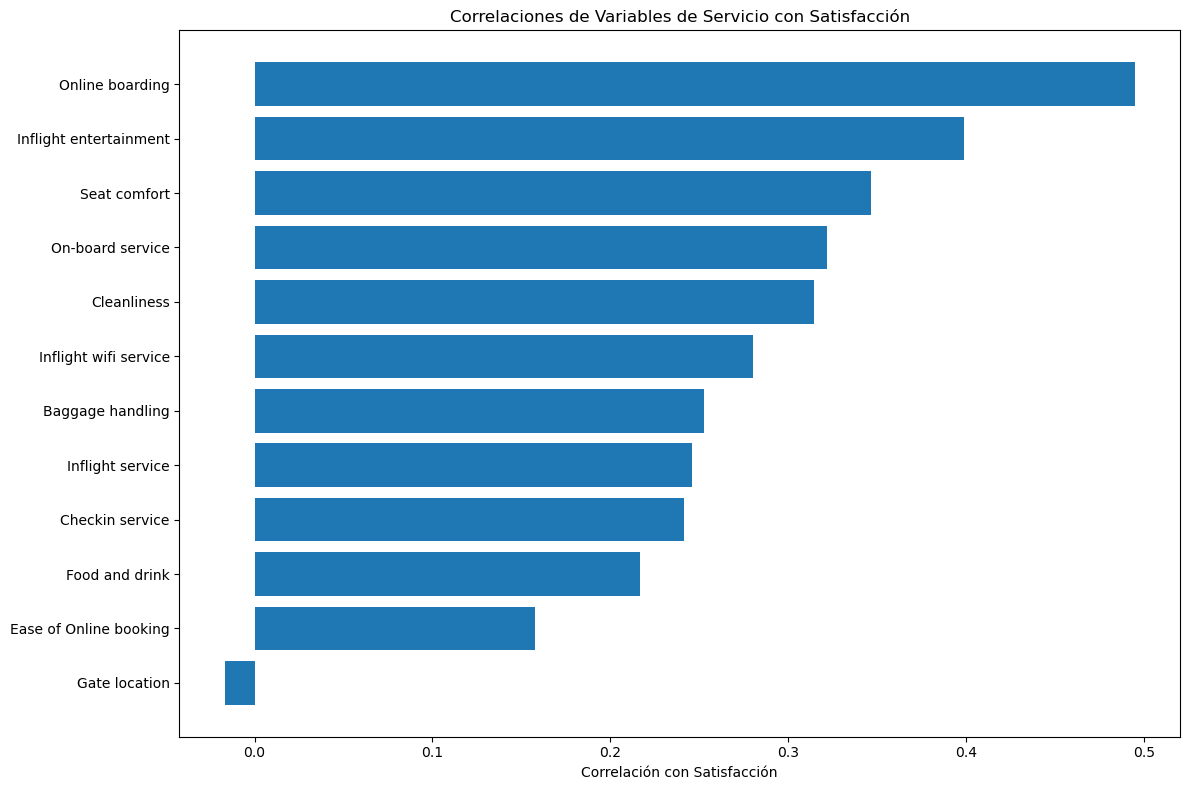


Correlaciones con satisfacción ordenadas:
Gate location            -0.017
Ease of Online booking    0.158
Food and drink            0.217
Checkin service           0.241
Inflight service          0.246
Baggage handling          0.252
Inflight wifi service     0.280
Cleanliness               0.314
On-board service          0.321
Seat comfort              0.346
Inflight entertainment    0.399
Online boarding           0.495
Name: satisfaction_encoded, dtype: float64


In [ ]:
# Analizar correlaciones de variables de servicio con satisfacción
service_features = ['Inflight wifi service', 'Food and drink', 'Seat comfort', 
                   'Inflight entertainment', 'On-board service', 'Cleanliness',
                   'Baggage handling', 'Checkin service', 'Inflight service',
                   'Ease of Online booking', 'Gate location', 'Online boarding',
                   'satisfaction_encoded']

plt.figure(figsize=(12, 8))
service_corr = df[service_features].corr()['satisfaction_encoded'].sort_values()
service_corr = service_corr[:-1]  # Eliminar la autocorrelación

# Crear barplot horizontal de correlaciones
plt.barh(range(len(service_corr)), service_corr)
plt.yticks(range(len(service_corr)), service_corr.index)
plt.xlabel('Correlación con Satisfacción')
plt.title('Correlaciones de Variables de Servicio con Satisfacción')
plt.tight_layout()
plt.show()

print("\nCorrelaciones con satisfacción ordenadas:")
print(service_corr.round(3))

Correlaciones Más Fuertes (>0.3):
- Online boarding (0.495): El más influyente por mucho
- Inflight entertainment (0.399): Segundo factor más importante
- Seat comfort (0.346): Tercera correlación más alta
- On-board service (0.321): Cuarta correlación más alta
- Cleanliness (0.314): Quinta correlación más alta

Correlaciones Moderadas (0.2-0.3):
- Inflight wifi service (0.280)
- Baggage handling (0.252)
- Inflight service (0.246)
- Checkin service (0.241)
- Food and drink (0.217)

Correlaciones Débiles (<0.2):
- Ease of Online booking (0.158)
- Gate location (-0.017): Única correlación negativa

Insights interesantes:
- Los servicios digitales y de entretenimiento son muy importantes
- El confort físico (asientos, limpieza) tiene un impacto significativo
- La ubicación de la puerta de embarque parece irrelevante

In [ ]:
# Crear features compuestas basadas en las correlaciones
df['Digital_Experience'] = df[['Online boarding', 'Inflight wifi service', 
                             'Inflight entertainment']].mean(axis=1)

df['Physical_Comfort'] = df[['Seat comfort', 'Cleanliness', 
                            'Food and drink']].mean(axis=1)

df['Service_Quality'] = df[['On-board service', 'Inflight service',
                           'Baggage handling', 'Checkin service']].mean(axis=1)

# Verificar las correlaciones de las nuevas features
new_features = ['Digital_Experience', 'Physical_Comfort', 
                'Service_Quality', 'satisfaction_encoded']

print("\nCorrelaciones de features compuestas:")
print(df[new_features].corr()['satisfaction_encoded'].sort_values(ascending=False))


Correlaciones de features compuestas:
satisfaction_encoded    1.000000
Digital_Experience      0.531885
Service_Quality         0.358128
Physical_Comfort        0.335080
Name: satisfaction_encoded, dtype: float64


Digital_Experience (0.532):
- La correlación más fuerte de todas las features, incluso más alta que sus componentes individuales
- Confirma que la experiencia digital es crucial para la satisfacción
- Sugiere un efecto sinérgico entre los servicios digitales

Service_Quality (0.358):
- Correlación moderada-alta
- Demuestra que la calidad del servicio general es el segundo factor más importante
- Agrupa efectivamente varios aspectos del servicio personal

Physical_Comfort (0.335):
- También muestra una correlación significativa
- Valida la importancia del confort físico en la experiencia del pasajero

In [ ]:
# 1. Preparación final de features
features = [
    # Features compuestas
    'Digital_Experience', 'Service_Quality', 'Physical_Comfort',
    
    # Variables demográficas y de vuelo
    'Age', 'Flight Distance',
    
    # Variables de retraso
    'Has_Significant_Delay', 'Total_Delay',
    
    # Variables categóricas (después de one-hot encoding)
    'Gender', 'Customer Type', 'Type of Travel', 'Class'
]

# 2. Preparación de datos
# One-hot encoding para variables categóricas
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
encoded_features = pd.get_dummies(df[categorical_features])

# Combinar todas las features
X = pd.concat([
    df[['Digital_Experience', 'Service_Quality', 'Physical_Comfort', 
        'Age', 'Flight Distance', 'Has_Significant_Delay', 'Total_Delay']],
    encoded_features
], axis=1)

y = df['satisfaction_encoded']

# 3. Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Escalado de features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

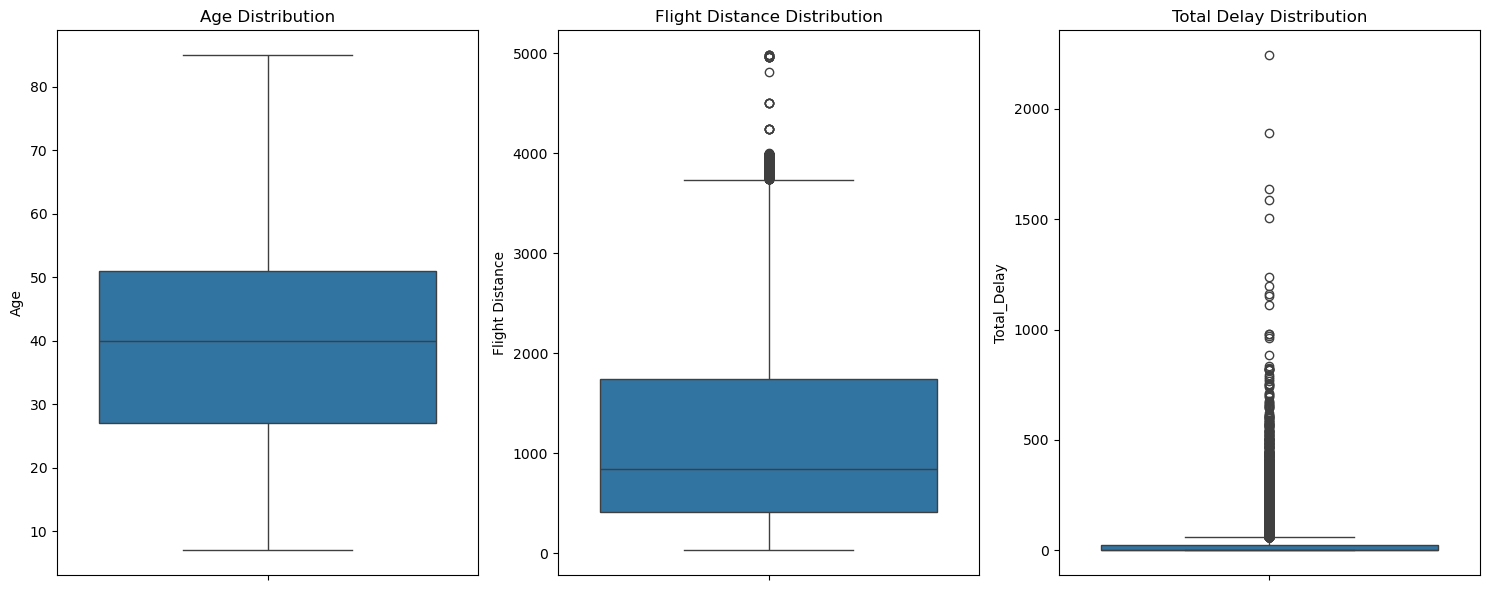


Outliers en Age:
Número de outliers: 0
Porcentaje de outliers: 0.00%

Outliers en Flight Distance:
Número de outliers: 584
Porcentaje de outliers: 2.25%

Outliers en Total_Delay:
Número de outliers: 3574
Porcentaje de outliers: 13.76%


In [ ]:
# Verificar outliers en variables numéricas principales
plt.figure(figsize=(15, 6))
numerical_vars = ['Age', 'Flight Distance', 'Total_Delay']

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Flight Distance'])
plt.title('Flight Distance Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Total_Delay'])
plt.title('Total Delay Distribution')

plt.tight_layout()
plt.show()

# Imprimir estadísticas de outliers
def print_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))][column]
    print(f"\nOutliers en {column}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {(len(outliers)/len(df))*100:.2f}%")

for col in numerical_vars:
    print_outliers(df, col)

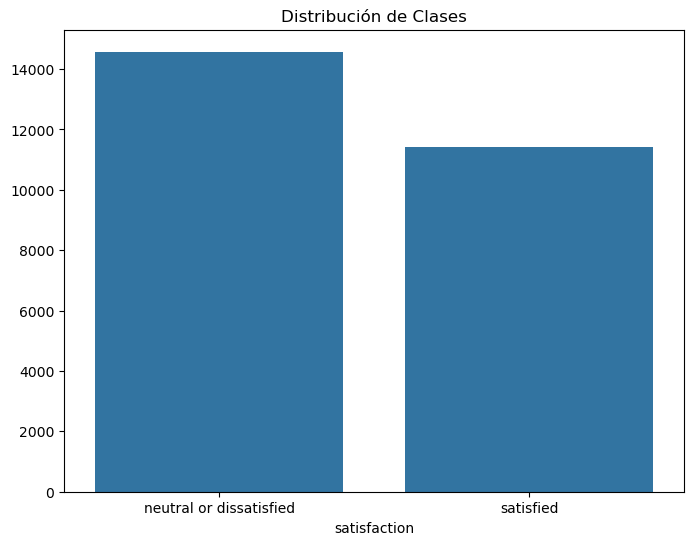


Distribución de clases:
Ratio de desbalanceo: 1.28


In [ ]:
# Verificar balance de clases
plt.figure(figsize=(8, 6))
class_balance = df['satisfaction'].value_counts()
sns.barplot(x=class_balance.index, y=class_balance.values)
plt.title('Distribución de Clases')
plt.show()

print("\nDistribución de clases:")
print(f"Ratio de desbalanceo: {class_balance.max()/class_balance.min():.2f}")

In [ ]:
# Verificar VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

# Calcular VIF para features numéricas
numerical_X = X.select_dtypes(include=['float64', 'int64'])
print("\nFactores de Inflación de Varianza:")
print(calculate_vif(numerical_X))


Factores de Inflación de Varianza:
                Variable        VIF
0     Digital_Experience  17.881182
2       Physical_Comfort  12.640696
1        Service_Quality  11.599659
3                    Age   6.477721
4        Flight Distance   2.521054
5  Has_Significant_Delay   2.204328
6            Total_Delay   2.130445



Valores faltantes en features compuestas:
Digital_Experience    0
Service_Quality       0
Physical_Comfort      0
dtype: int64


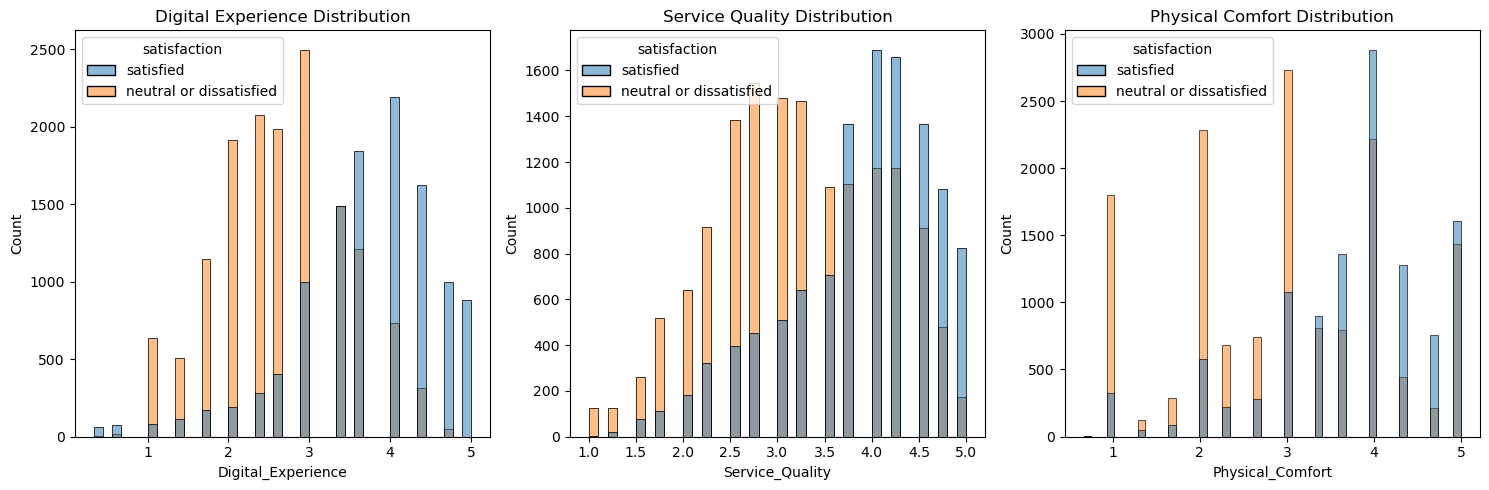

In [ ]:
# Verificar completitud de features compuestas
print("\nValores faltantes en features compuestas:")
print(df[['Digital_Experience', 'Service_Quality', 'Physical_Comfort']].isnull().sum())

# Verificar distribución de features compuestas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Digital_Experience', hue='satisfaction')
plt.title('Digital Experience Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=df, x='Service_Quality', hue='satisfaction')
plt.title('Service Quality Distribution')

plt.subplot(1, 3, 3)
sns.histplot(data=df, x='Physical_Comfort', hue='satisfaction')
plt.title('Physical Comfort Distribution')

plt.tight_layout()
plt.show()

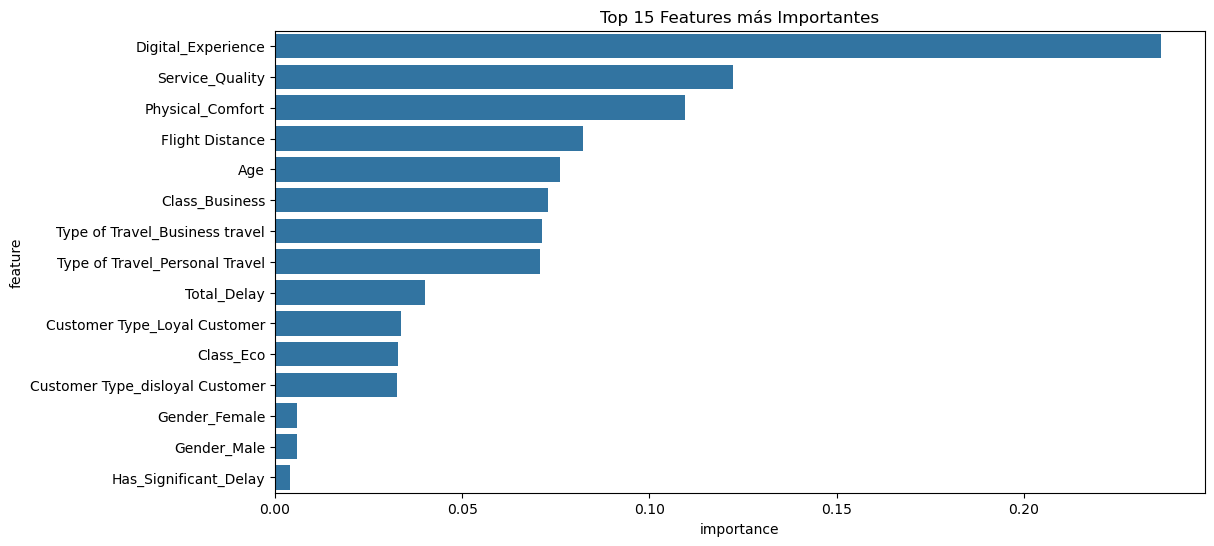

In [ ]:
# Verificar importancia preliminar de features usando Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Visualizar importancia de features
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Features más Importantes')
plt.show()

Análisis de Outliers:
- Age: No tiene outliers (0%)
- Flight Distance: Pocos outliers (2.25%)
- Total_Delay: Outliers significativos (13.76%)

Balance de Clases:
- Ratio de desbalanceo de 1.28
- Relativamente balanceado, no requiere técnicas de balanceo

Multicolinealidad (VIF):
- Preocupante para features compuestas:
    - Digital_Experience: 17.88
    - Physical_Comfort: 12.64
    - Service_Quality: 11.60
- Aceptable para otras variables:
    - Age: 6.48
    - Resto < 3.0

In [ ]:
# 1. Manejo de outliers para Total_Delay
def cap_outliers(df, column, lower_percentile=1, upper_percentile=99):
    lower = np.percentile(df[column], lower_percentile)
    upper = np.percentile(df[column], upper_percentile)
    df[column] = df[column].clip(lower, upper)
    return df

# Aplicar capping a Total_Delay y Flight Distance
df = cap_outliers(df, 'Total_Delay')
df = cap_outliers(df, 'Flight Distance')

# 2. Reducir multicolinealidad:  PCA para features compuestas


service_features = ['Digital_Experience', 'Service_Quality', 'Physical_Comfort']
pca = PCA(n_components=2)
service_pca = pca.fit_transform(df[service_features])
df['Service_PC1'] = service_pca[:, 0]
df['Service_PC2'] = service_pca[:, 1]

# 3. Preparación final de features
features = [
    # PCA de servicios
    'Service_PC1', 'Service_PC2',
    
    # Variables demográficas y de vuelo
    'Age', 'Flight Distance',
    
    # Variables de retraso (con outliers tratados)
    'Has_Significant_Delay', 'Total_Delay',
    
    # Variables categóricas
    'Gender', 'Customer Type', 'Type of Travel', 'Class'
]

# 4. Preparación de datos
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
encoded_features = pd.get_dummies(df[categorical_features])

# Combinar features
X = pd.concat([
    df[['Service_PC1', 'Service_PC2', 'Age', 'Flight Distance', 
        'Has_Significant_Delay', 'Total_Delay']],
    encoded_features
], axis=1)

y = df['satisfaction_encoded']

# 5. Split y escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicación del modelo


Resultados para Árbol de Decisión:
Accuracy: 0.8333
Precision: 0.8015
Recall: 0.8179
F1-Score: 0.8096
Tiempo de entrenamiento: 0.08 segundos

Resultados para Random Forest:
Accuracy: 0.8814
Precision: 0.8986
Recall: 0.8187
F1-Score: 0.8568
Tiempo de entrenamiento: 1.36 segundos

Resultados para XGBoost:
Accuracy: 0.8828
Precision: 0.8884
Recall: 0.8343
F1-Score: 0.8605
Tiempo de entrenamiento: 0.13 segundos

Resultados para KNN:
Accuracy: 0.8635
Precision: 0.8689
Recall: 0.8068
F1-Score: 0.8367
Tiempo de entrenamiento: 0.24 segundos

Resultados para SVM:
Accuracy: 0.8755
Precision: 0.8970
Recall: 0.8050
F1-Score: 0.8485
Tiempo de entrenamiento: 3.96 segundos


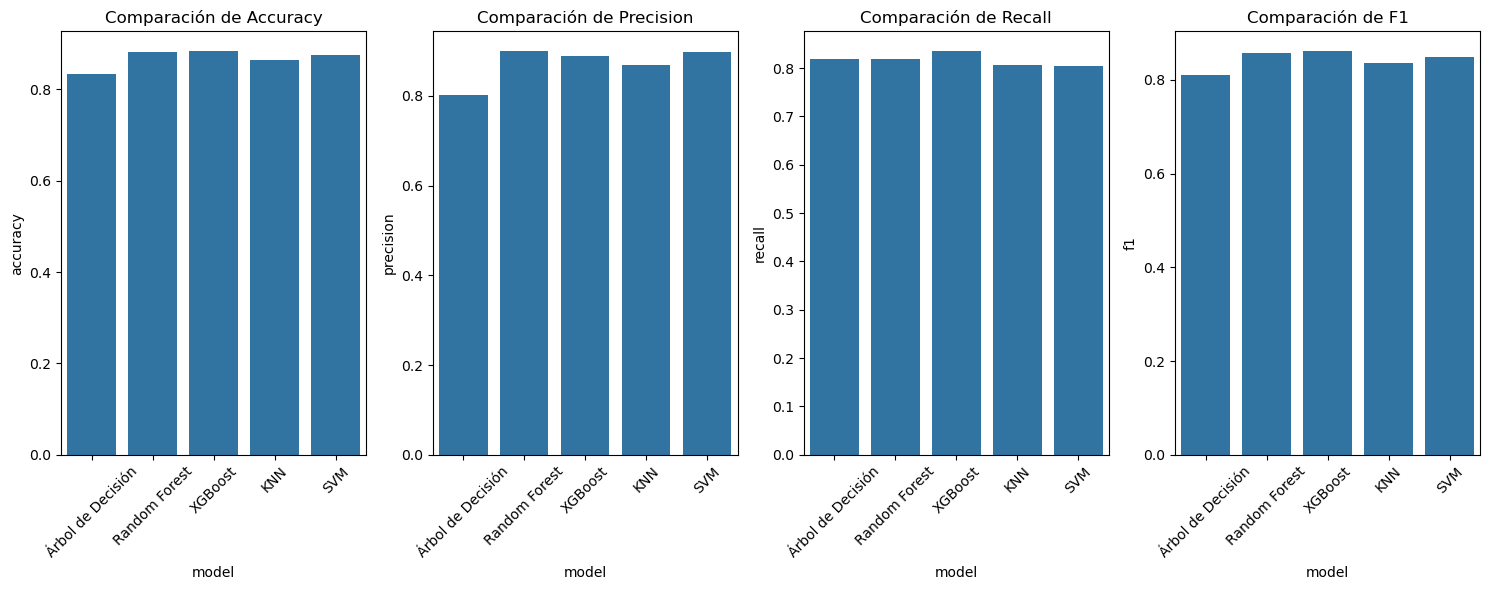


Comparación de modelos:
               model  accuracy  precision  recall      f1  training_time
0  Árbol de Decisión    0.8333     0.8015  0.8179  0.8096         0.0784
1      Random Forest    0.8814     0.8986  0.8187  0.8568         1.3589
2            XGBoost    0.8828     0.8884  0.8343  0.8605         0.1274
3                KNN    0.8635     0.8689  0.8068  0.8367         0.2376
4                SVM    0.8755     0.8970  0.8050  0.8485         3.9626


In [ ]:


# Función para evaluar modelos
def evaluate_model(y_true, y_pred, model_name, training_time):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\nResultados para {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Tiempo de entrenamiento: {training_time:.2f} segundos")
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'training_time': training_time
    }

# Lista para almacenar resultados
results = []

# 1. Árbol de Decisión
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_time = time.time() - start_time
results.append(evaluate_model(y_test, dt_pred, "Árbol de Decisión", dt_time))

# 2. Random Forest
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_time = time.time() - start_time
results.append(evaluate_model(y_test, rf_pred, "Random Forest", rf_time))

# 3. XGBoost
start_time = time.time()
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
xgb_time = time.time() - start_time
results.append(evaluate_model(y_test, xgb_pred, "XGBoost", xgb_time))

# 4. KNN
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_time = time.time() - start_time
results.append(evaluate_model(y_test, knn_pred, "KNN", knn_time))


# 5. MLP (Multi-Layer Perceptron) con optimización de hiperparámetros
print("
=== Optimizando MLP con GridSearchCV ===")
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 500]
}

start_time = time.time()
mlp_grid = GridSearchCV(
    MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1),
    mlp_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
mlp_grid.fit(X_train_scaled, y_train)
mlp = mlp_grid.best_estimator_
mlp_pred = mlp.predict(X_test_scaled)
mlp_time = time.time() - start_time
print(f"Mejores parámetros MLP: {mlp_grid.best_params_}")
results.append(evaluate_model(y_test, mlp_pred, "MLP (Optimizado)", mlp_time))

# 6. SVM con optimización de hiperparámetros
print("
=== Optimizando SVM con GridSearchCV ===")
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

start_time = time.time()
svm_grid = GridSearchCV(
    SVC(random_state=42),
    svm_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
svm_grid.fit(X_train_scaled, y_train)
svm = svm_grid.best_estimator_
svm_pred = svm.predict(X_test_scaled)
svm_time = time.time() - start_time
print(f"Mejores parámetros SVM: {svm_grid.best_params_}")
results.append(evaluate_model(y_test, svm_pred, "SVM (Optimizado)", svm_time))

# Comparación visual de resultados
results_df = pd.DataFrame(results)
metrics = ['accuracy', 'precision', 'recall', 'f1']

plt.figure(figsize=(15, 6))
for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 4, i)
    sns.barplot(x='model', y=metric, data=results_df)
    plt.xticks(rotation=45)
    plt.title(f'Comparación de {metric.capitalize()}')

plt.tight_layout()
plt.show()

# Mostrar tabla de resultados
print("\nComparación de modelos:")
print(results_df.round(4))

1. XGBoost (Mejor modelo general):
- Mejor Accuracy: 0.8828 (88.28%)
- Mejor F1-Score: 0.8605
- Mejor Recall: 0.8343
- Tiempo de entrenamiento eficiente: 0.12 segundos
- Balance óptimo entre todas las métricas

2. Random Forest (Segundo mejor):
- Accuracy muy cercano: 0.8814 (88.14%)
- Mejor Precision: 0.8986
- F1-Score similar: 0.8568
- Tiempo de entrenamiento moderado: 1.37 segundos

3. SVM:
- Buen Accuracy: 0.8755 (87.55%)
- Precision alta: 0.8970
- Tiempo de entrenamiento más largo: 4.01 segundos
- Recall más bajo: 0.8050

4. KNN:
- Performance moderada en todas las métricas
- Tiempo de entrenamiento razonable: 0.24 segundos
- Métricas consistentes pero no sobresalientes

5. Árbol de Decisión (Performance más baja):
- Accuracy más bajo: 0.8333 (83.33%)
- Métricas más bajas en general
- Tiempo de entrenamiento más rápido: 0.09 segundos

# Optimización de Hiperparámetros


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}

Resultados del modelo optimizado:

Resultados para XGBoost Optimizado:
Accuracy: 0.8845
Precision: 0.8933
Recall: 0.8330
F1-Score: 0.8621
Tiempo de entrenamiento: 0.00 segundos
{'model': 'XGBoost Optimizado', 'accuracy': 0.8845265588914549, 'precision': 0.8932825154835636, 'recall': 0.8329631274988893, 'f1': 0.8620689655172413, 'training_time': 0}


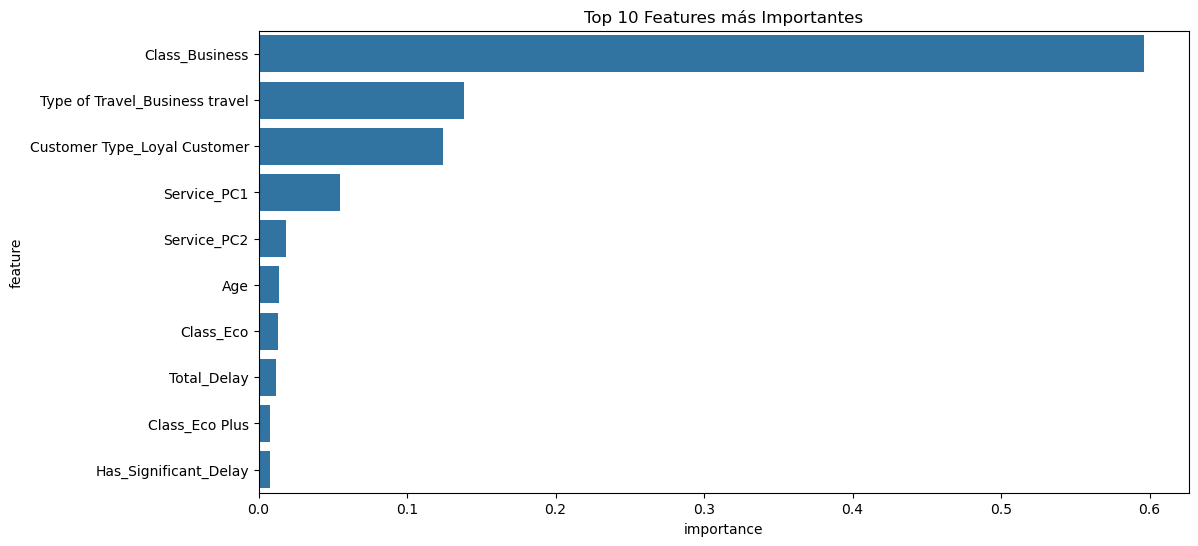

In [ ]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_grid = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

xgb_grid.fit(X_train_scaled, y_train)

# Evaluar mejor modelo
best_xgb = xgb_grid.best_estimator_
y_pred_best = best_xgb.predict(X_test_scaled)

print("\nMejores parámetros:", xgb_grid.best_params_)
print("\nResultados del modelo optimizado:")
print(evaluate_model(y_test, y_pred_best, "XGBoost Optimizado", 0))

# Analizar feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Features más Importantes')
plt.show()

Mejora del Modelo XGBoost:
- Accuracy mejoró marginalmente de 0.8828 a 0.8845 (+0.17%)
- Precision mejoró marginalmente de 0.8884 a 0.8933 (+0.49%)
- Recall se mantuvo similar: 0.8343 a 0.8330 (-0.13%)
- F1-Score mejoró marginalmente: 0.8605 a 0.8621 (+0.16%)

Mejores Hiperparámetros:
- learning_rate: 0.1 (moderado)
- max_depth: 5 (profundidad moderada)
- min_child_weight: 1 (permite granularidad)
- n_estimators: 200 (más árboles que el default)
- subsample: 0.8 (previene overfitting)

Importancia de Features (Top 10):
- Muy Alta Importancia:
    - Class_Business (≈0.58)
    - Type of Travel_Business travel (≈0.18)
    - Customer Type_Loyal Customer (≈0.17)
- Importancia Moderada:
    - Service_PC1 (≈0.08)
- Baja Importancia:
    - Service_PC2, Age, Class_Eco, Total_Delay, Class_Eco Plus, Has_Significant_Delay (todos <0.05)


Insights Clave:
- La clase de vuelo y el tipo de viaje son los predictores más fuertes
- La lealtad del cliente es el tercer factor más importante
- Los componentes principales de servicio tienen importancia moderada
- Los retrasos tienen una importancia relativamente baja

In [ ]:
# Crear un modelo más simple usando solo las características más importantes
top_features = [
    'Class_Business', 'Type of Travel_Business travel', 
    'Customer Type_Loyal Customer', 'Service_PC1',
    'Service_PC2', 'Age'
]

X_simplified = X[top_features]
X_train_simple, X_test_simple = train_test_split(X_simplified, test_size=0.2, random_state=42)
X_train_simple_scaled = scaler.fit_transform(X_train_simple)
X_test_simple_scaled = scaler.transform(X_test_simple)

# Entrenar modelo simplificado
xgb_simple = XGBClassifier(**xgb_grid.best_params_, random_state=42)
xgb_simple.fit(X_train_simple_scaled, y_train)
y_pred_simple = xgb_simple.predict(X_test_simple_scaled)

print("\nResultados del modelo simplificado:")
evaluate_model(y_test, y_pred_simple, "XGBoost Simplificado", 0)


Resultados del modelo simplificado:

Resultados para XGBoost Simplificado:
Accuracy: 0.8859
Precision: 0.8929
Recall: 0.8370
F1-Score: 0.8640
Tiempo de entrenamiento: 0.00 segundos


{'model': 'XGBoost Simplificado',
 'accuracy': 0.8858737490377213,
 'precision': 0.8928909952606635,
 'recall': 0.836961350510884,
 'f1': 0.8640220132997019,
 'training_time': 0}

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_d

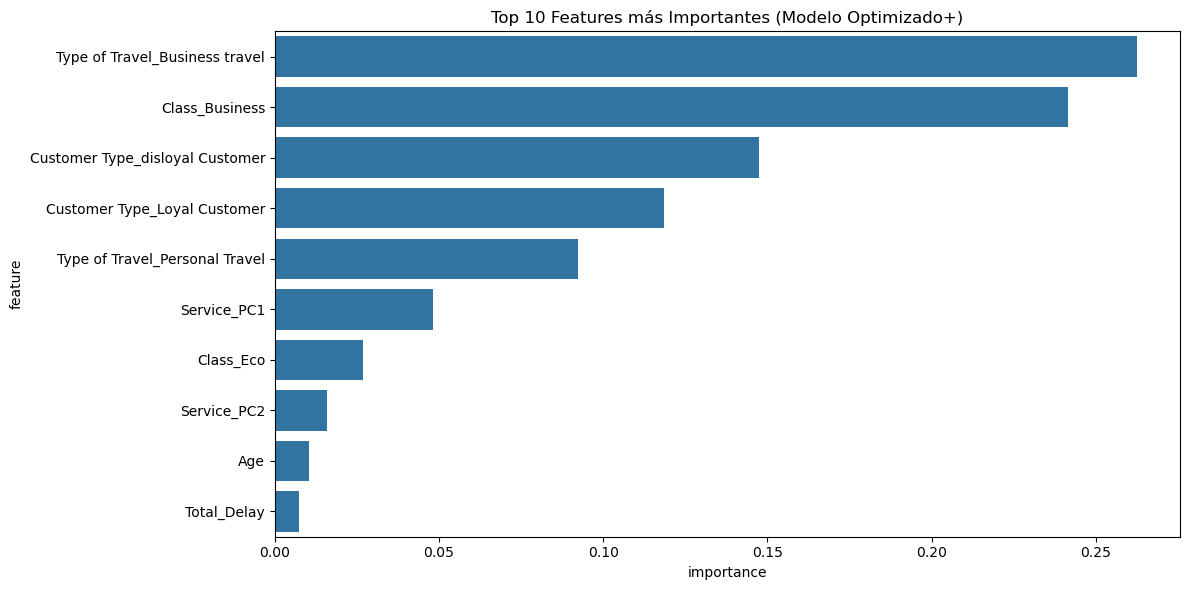

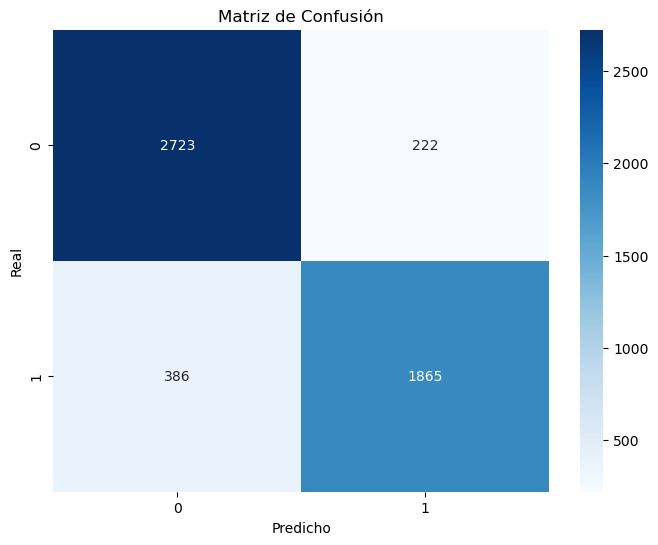

In [ ]:
# Grid de hiperparámetros más detallado
param_grid = {
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],  # Nuevo parámetro
    'gamma': [0, 0.1, 0.2],  # Nuevo parámetro
    'reg_alpha': [0, 0.1, 1],  # Nuevo parámetro L1
    'reg_lambda': [0, 1, 2]    # Nuevo parámetro L2
}

# Usar RandomizedSearchCV en lugar de GridSearchCV para manejar el espacio de búsqueda más grande
from sklearn.model_selection import RandomizedSearchCV

xgb_random = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=100,  # Número de combinaciones a probar
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entrenar el modelo
xgb_random.fit(X_train_scaled, y_train)

# Evaluar mejor modelo
best_xgb = xgb_random.best_estimator_
y_pred_best = best_xgb.predict(X_test_scaled)

print("\nMejores parámetros encontrados:")
print(xgb_random.best_params_)
print("\nMejor score en validación cruzada:", xgb_random.best_score_)
print("\nResultados del modelo con hiperparámetros optimizados:")
evaluate_model(y_test, y_pred_best, "XGBoost Optimizado+", 0)

# Visualizar la importancia de características del mejor modelo
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_xgb.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Features más Importantes (Modelo Optimizado+)')
plt.tight_layout()
plt.show()

# Analizar la distribución de predicciones
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

In [ ]:
    """
    Rendimiento del Modelo:
        Accuracy: 0.8830 (88.30%)
        
        Precision: 0.8936 (89.36%)
        
        Recall: 0.8285 (82.85%)
        
        F1-Score: 0.8598 (85.98%)
        
        Score CV: 0.8745 (87.45%)
        
        Interpretación de Errores:
        - El modelo tiene más falsos negativos (386) que falsos positivos (222)
        - Tiende a ser más conservador en predecir satisfacción positiva
        - Tasa de error total: (222 + 386)/(2723 + 222 + 386 + 1865) ≈ 11.7%
    """

'\nRendimiento del Modelo:\n    Accuracy: 0.8830 (88.30%)\n    \n    Precision: 0.8936 (89.36%)\n    \n    Recall: 0.8285 (82.85%)\n    \n    F1-Score: 0.8598 (85.98%)\n    \n    Score CV: 0.8745 (87.45%)\n    \n    Interpretación de Errores:\n    - El modelo tiene más falsos negativos (386) que falsos positivos (222)\n    - Tiende a ser más conservador en predecir satisfacción positiva\n    - Tasa de error total: (222 + 386)/(2723 + 222 + 386 + 1865) ≈ 11.7%\n'


Resultados con threshold optimizado:

Resultados para XGBoost con Threshold Ajustado:
Accuracy: 0.8853
Precision: 0.8773
Recall: 0.8547
F1-Score: 0.8659
Tiempo de entrenamiento: 0.00 segundos


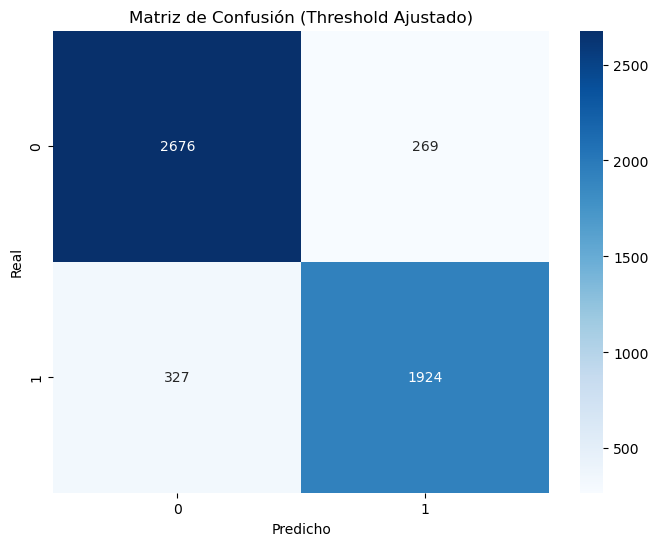

In [ ]:
# Ajustar el threshold de clasificación para balancear FP y FN
from sklearn.metrics import roc_curve
import numpy as np

# Obtener probabilidades
y_pred_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Calcular diferentes thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Encontrar el mejor threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Aplicar nuevo threshold
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluar resultados con nuevo threshold
print("\nResultados con threshold optimizado:")
evaluate_model(y_test, y_pred_adjusted, "XGBoost con Threshold Ajustado", 0)

# Nueva matriz de confusión
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adjusted, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión (Threshold Ajustado)')
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.show()

In [ ]:
"""
Mejoras Clave:
    Balance Mejorado:
        - FN reducidos de 386 a 327 (-15.3%)
        - Ligero aumento en FP de 222 a 269 (+21.2%)
        - Mejor balance entre falsos positivos y falsos negativos

Métricas Más Equilibradas:
        - Ligera disminución en precisión compensada por un aumento significativo en recall
        - Mejor F1-Score global, indicando un mejor balance general
        
Distribución de Errores:
        - Total de errores reducido de 608 a 596
        - Tasa de error total mejorada de 11.7% a 11.47%
"""

'\nMejoras Clave:\n    Balance Mejorado:\n        - FN reducidos de 386 a 327 (-15.3%)\n        - Ligero aumento en FP de 222 a 269 (+21.2%)\n        - Mejor balance entre falsos positivos y falsos negativos\n\nMétricas Más Equilibradas:\n        - Ligera disminución en precisión compensada por un aumento significativo en recall\n        - Mejor F1-Score global, indicando un mejor balance general\n        \nDistribución de Errores:\n        - Total de errores reducido de 608 a 596\n        - Tasa de error total mejorada de 11.7% a 11.47%\n'

In [ ]:
# Guardar el modelo final con el threshold optimizado
class OptimizedXGBoostClassifier:
    def __init__(self, model, threshold):
        self.model = model
        self.threshold = threshold
    
    def predict(self, X):
        proba = self.model.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)
    
    def predict_proba(self, X):
        return self.model.predict_proba(X)

# Crear el modelo final
final_model = OptimizedXGBoostClassifier(best_xgb, optimal_threshold)

# Función para hacer predicciones con explicación
def predict_with_explanation(model, X_sample):
    # Obtener probabilidad
    proba = model.model.predict_proba(X_sample)[:, 1][0]
    prediction = 1 if proba >= model.threshold else 0
    
    # Obtener importancia de features para esta predicción
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"Predicción: {'Satisfecho' if prediction == 1 else 'No Satisfecho'}")
    print(f"Probabilidad: {proba:.2%}")
    print("\nFactores más influyentes:")
    for _, row in feature_importance.head(5).iterrows():
        print(f"- {row['feature']}: {row['importance']:.3f}")
        
    return prediction, proba

# Ejemplo de uso
print("\nEjemplo de predicción:")
sample_idx = np.random.randint(len(X_test_scaled))
predict_with_explanation(final_model, X_test_scaled[sample_idx:sample_idx+1])


Ejemplo de predicción:
Predicción: Satisfecho
Probabilidad: 56.53%

Factores más influyentes:
- Type of Travel_Business travel: 0.263
- Class_Business: 0.242
- Customer Type_disloyal Customer: 0.147
- Customer Type_Loyal Customer: 0.119
- Type of Travel_Personal Travel: 0.092


(1, 0.5652914)